In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.naive_bayes import GaussianNB 
from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split 

In [2]:
digits = load_digits() 
X,y = digits.data, digits.target 

In [3]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3,random_state= 420) 

In [4]:
Xtrain.shape # 64 features 

(1257, 64)

In [5]:
Xtest.shape 

(540, 64)

In [6]:
np.unique(ytrain) 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
# model 
gnb = GaussianNB().fit(Xtrain,ytrain) 
# 查看分数
acc_score = gnb.score(Xtest,ytest)

In [8]:
acc_score # accuracy 

0.8592592592592593

In [9]:
# prediction 
Y_pred = gnb.predict(Xtest) 
Y_pred 

array([6, 1, 3, 0, 4, 5, 0, 8, 3, 8, 6, 8, 7, 8, 8, 8, 5, 9, 5, 6, 5, 4,
       7, 4, 8, 2, 7, 2, 8, 9, 2, 8, 3, 6, 0, 3, 8, 8, 1, 5, 2, 8, 8, 9,
       2, 2, 0, 7, 3, 6, 7, 2, 8, 0, 5, 4, 1, 9, 4, 0, 5, 8, 9, 1, 7, 8,
       7, 5, 8, 2, 4, 4, 8, 2, 6, 1, 2, 1, 7, 8, 8, 5, 9, 4, 3, 6, 9, 7,
       4, 2, 4, 8, 0, 5, 7, 7, 7, 4, 7, 8, 8, 7, 0, 7, 2, 1, 9, 9, 8, 7,
       1, 5, 1, 8, 0, 4, 8, 9, 5, 6, 4, 8, 3, 8, 0, 6, 8, 6, 7, 6, 1, 8,
       5, 0, 8, 2, 1, 8, 8, 6, 6, 0, 2, 4, 7, 8, 9, 5, 9, 4, 7, 8, 8, 6,
       7, 0, 8, 4, 7, 2, 2, 6, 4, 4, 1, 0, 3, 4, 3, 8, 7, 0, 6, 9, 7, 5,
       5, 3, 6, 1, 6, 6, 2, 3, 8, 2, 7, 3, 1, 1, 6, 8, 8, 8, 7, 7, 2, 5,
       0, 0, 8, 6, 6, 7, 6, 0, 7, 5, 5, 8, 4, 6, 5, 1, 5, 1, 9, 6, 8, 8,
       8, 2, 4, 8, 6, 5, 9, 9, 3, 1, 9, 1, 3, 3, 5, 5, 7, 7, 4, 0, 9, 0,
       9, 9, 6, 4, 3, 4, 8, 1, 0, 2, 9, 7, 6, 8, 8, 0, 6, 0, 1, 7, 1, 9,
       5, 4, 6, 8, 1, 5, 7, 7, 5, 1, 0, 0, 9, 3, 9, 1, 6, 3, 7, 2, 7, 1,
       9, 9, 8, 3, 3, 5, 7, 7, 7, 3, 9, 5, 0, 7, 5,

In [10]:
# prediction probability 
prob = gnb.predict_proba(Xtest) 


In [11]:
prob.shape 

(540, 10)

In [12]:
prob[1,:]# 样本在每个标签下的概率

array([0.00000000e+00, 1.00000000e+00, 9.26742456e-13, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [13]:
prob[1,:].sum()

1.000000000000003

In [14]:
prob.sum(axis = 1).shape 

(540,)

In [15]:
from sklearn.metrics import confusion_matrix as CM 

In [16]:
CM(ytest,Y_pred)

array([[47,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 46,  2,  0,  0,  0,  0,  3,  6,  2],
       [ 0,  2, 35,  0,  0,  0,  1,  0, 16,  0],
       [ 0,  0,  1, 40,  0,  1,  0,  3,  4,  0],
       [ 0,  0,  1,  0, 39,  0,  1,  4,  0,  0],
       [ 0,  0,  0,  2,  0, 58,  1,  1,  1,  0],
       [ 0,  0,  1,  0,  0,  1, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  3,  0,  1,  0,  0,  0,  2, 55,  0],
       [ 1,  1,  0,  1,  2,  0,  0,  3,  7, 41]])

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from time import time
import datetime 

In [18]:
# learning curve functions 
def plot_learning_curve(estimator,title,X,y,ax,
                       ylim = None, 
                       cv = None, 
                       n_jobs = None 
                       ): 
    train_sizes, train_scores, test_scores = learning_curve(estimator,X,y,cv = cv,n_jobs = n_jobs) 
    ax.set_title(title) 
    if ylim is not None: 
        ax.set_ylim(*ylim) 
    ax.set_xlabel('training examples') 
    ax.set_ylabel('Score') 
    ax.grid()
    ax.plot(train_sizes,np.mean(train_scores,axis = 1),'o-',color = 'r',label = 'Training score')
    ax.plot(train_sizes,np.mean(test_scores,axis = 1),'o-',color = 'g',label = 'Test score') 
    ax.legend(loc = 'best') 
    
    return ax 


In [19]:
# load datasets 
digits = load_digits() 


In [20]:
X,y = digits.data, digits.target 

In [21]:
X.shape 

(1797, 64)

In [22]:
title = ['Native Bayes','Decision Tree','SVM, RBF kernel', 'Random Forest','Logistic'] 
model = [GaussianNB(),DTC(),SVC(gamma = 0.001),  
        RFC(n_estimators = 50),LR(C = 1,solver = 'lbfgs')] 
cv = ShuffleSplit(n_splits = 50, test_size= 0.2, random_state = 0) 


Native Bayes:00:02s:934689
Decision Tree:00:01s:439033
SVM, RBF kernel:00:15s:361862
Random Forest:00:12s:141084


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

Logistic:00:09s:636715


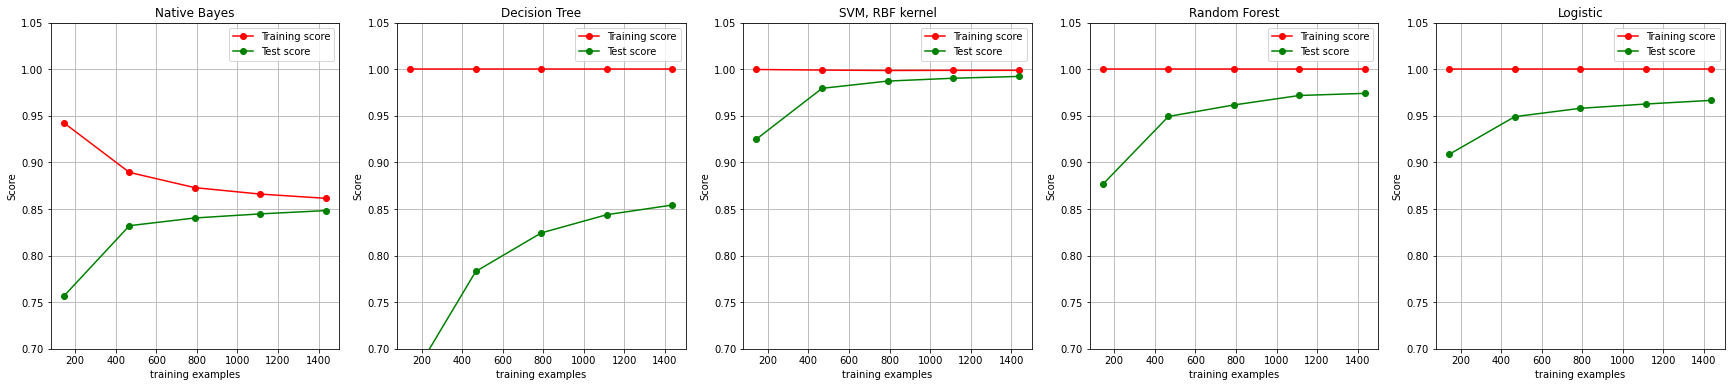

In [23]:
# loop, find learing curve 
fig,axes = plt.subplots(1,5,figsize = (30,6)) 
for ind,title_,estimator in zip(range(len(title)),title,model): 
    times = time() 
    plot_learning_curve(estimator,title_,X,y, 
                        ax = axes[ind],ylim = [0.7,1.05],n_jobs = 4,cv = cv) 
    print('{}:{}'.format(title_,datetime.datetime.fromtimestamp(time()-times).strftime("%M:%Ss:%f"))) 
plt.show() 

In [100]:
#from sklearn.metrics import brier_score_loss 
#brier_score_loss(ytest,prob[:,1],pos_label=1) # Now brier_score not support multiclass 

In [25]:
import pandas as pd 

In [26]:
# dummy variable of y 
ytest = ytest.copy() 
ytest = pd.get_dummies(ytest) 

In [27]:
for i in range(10):
    bs = brier_score_loss(ytest[i],prob[:,i])  
    print(bs) 

0.003680512744365077
0.032619662406118764
0.04073796355303327
0.024227451061575995
0.013717124391784064
0.012770720966518715
0.008906952589951798
0.028006698663252037
0.0680707157691044
0.031524759298859326


In [28]:
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression as LR 
logi = LR(C = 1, solver = 'lbfgs',max_iter= 3000, multi_class= 'auto').fit(Xtrain,ytrain)  
svc = SVC(kernel = "linear",gamma=1).fit(Xtrain,ytrain)   

In [29]:
brier_score_loss(ytest[1],logi.predict_proba(Xtest)[:,1],pos_label=1)  

0.011439558355526819

In [30]:
svc.decision_function(Xtest) 

array([[ 6.24837122,  3.71700301,  2.71927921, ..., -0.31216676,
         8.31590244,  0.69032425],
       [-0.3087187 ,  9.31441373,  6.27530649, ...,  0.69093621,
         7.28364791,  3.83955107],
       [ 0.6906499 ,  2.71878697,  7.27763251, ...,  6.2744652 ,
         8.30835126,  5.28750364],
       ...,
       [ 4.78686312,  5.13417125, -0.3052943 , ...,  8.29648495,
         6.29518651,  1.69695548],
       [ 2.74874208,  2.6867217 ,  6.28769759, ...,  2.89864232,
         8.31336146,  7.27763454],
       [-0.31162689,  9.31682254,  4.89495994, ...,  5.84334803,
         7.30473457,  1.70688667]])

In [31]:
# 归一化 
svc_prob = (svc.decision_function(Xtest) - svc.decision_function(Xtest).min())/(svc.decision_function(Xtest).max() - svc.decision_function(Xtest).min()) 

In [32]:
brier_score_loss(ytest[1],svc_prob[:,1],pos_label = 1) 

0.24286480465579566

In [33]:
## Naive Bayes, SVM, Logistic Regression Comparison 
import pandas as pd 
name  = ['Bayes','Logistic','SVC'] 
color = ['red','black','orange'] 

df = pd.DataFrame(index = range(10),columns = name) 


In [34]:
for i in range(10):
    df.loc[i,name[0]] = brier_score_loss(ytest[i],prob[:,i],pos_label=i)
    df.loc[i,name[1]] = brier_score_loss(ytest[i],logi.predict_proba(Xtest)[:,i],pos_label=i)
    df.loc[i,name[2]] = brier_score_loss(ytest[i],svc_prob[:,i],pos_label=i)  

In [35]:
df 

,Bayes,Logistic,SVC
0,0.996244,0.999473,0.681634
1,0.0326197,0.0114396,0.242865
2,0.0733327,0.0953032,0.251131
3,0.0806967,0.0932588,0.450271
4,0.0751393,0.0849782,0.252574
5,0.110865,0.113096,0.352765
6,0.0959412,0.0949014,0.276426
7,0.128007,0.0965001,0.28853
8,0.158683,0.104194,0.640142
9,0.0789063,0.097844,0.396565


No handles with labels found to put in legend.


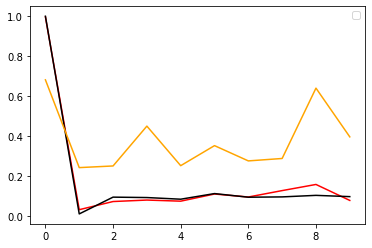

In [36]:
for i in range(df.shape[1]):
    plt.plot(range(10),df.iloc[:,i],c=color[i])
plt.legend()
plt.show()


In [37]:
# log loss
from sklearn.metrics import log_loss 
log_loss(ytest,prob) 

2.4725653911460683

In [38]:
log_loss(ytest,logi.predict_proba(Xtest)) 

0.12753849731379807

In [39]:
log_loss(ytest,svc_prob) 

1.6074987533411256

In [40]:
### reliability Curve 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification as mc
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import train_test_split 

In [41]:
X, y = mc(n_samples=100000,n_features=20 #总共20个特征
,n_classes=2 #标签为2分类
,n_informative=2 #其中两个代表较多信息
,n_redundant=10 #10个都是冗余特征
,random_state=42) 

In [42]:
X.shape 

(100000, 20)

In [43]:
np.unique(y) 

array([0, 1])

In [44]:
Xtrain, Xtest,Ytrain,Ytest = train_test_split(X,y, test_size= 0.99, random_state= 42) 

In [45]:
Xtrain.shape 

(1000, 20)

In [46]:
Xtest.shape 

(99000, 20)

In [47]:
gnb = GaussianNB() 
gnb.fit(Xtrain,Ytrain) 
y_pred = gnb.predict(Xtest) 
prob_pos = gnb.predict_proba(Xtest)[:,1] 

In [48]:
df = pd.DataFrame({'ytrue':Ytest[:500],'probability':prob_pos[:500]}) 


In [49]:
df 

,ytrue,probability
0,1,9.999997e-01
1,0,9.999964e-01
2,1,1.000000e+00
3,1,9.886612e-01
4,0,8.441773e-18
...,...,...
495,0,9.224911e-04
496,1,9.931903e-01
497,0,5.670253e-06
498,0,8.248345e-08


In [50]:
df = df.sort_values(by = 'probability',ascending= True) 

In [51]:
df.index = range(df.shape[0]) 

In [52]:
df 

,ytrue,probability
0,0,1.824809e-21
1,0,6.610435e-21
2,0,4.171566e-19
3,0,8.441773e-18
4,0,1.463199e-17
...,...,...
495,1,1.000000e+00
496,1,1.000000e+00
497,1,1.000000e+00
498,1,1.000000e+00


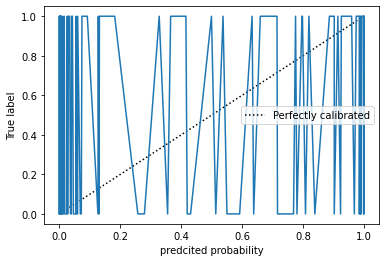

In [53]:
##reliability curve 
## MESSY 
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated") #得做一条对角线来对比呀
ax1.plot(df["probability"],df["ytrue"])
ax1.set_ylabel("True label")
ax1.set_xlabel("predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show() 

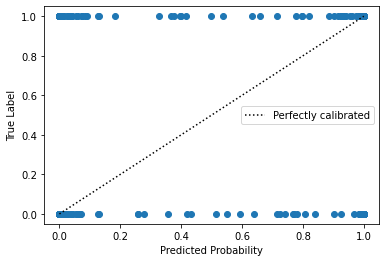

In [54]:
fig = plt.figure() 
ax1 = plt.subplot() 
ax1.plot([0,1],[0,1],'k:',label = 'Perfectly calibrated') 
ax1.scatter(df['probability'],df['ytrue']) 
ax1.set_ylabel('True Label') 
ax1.set_xlabel('Predicted Probability') 
ax1.set_ylim([-0.05,1.05]) 
ax1.legend() 
plt.show() 

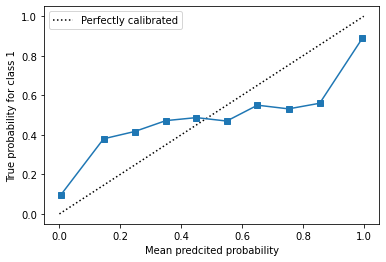

In [55]:
## calibration curve 
from sklearn.calibration import calibration_curve 
trueproba, predproba = calibration_curve(Ytest,prob_pos,
                                         n_bins = 10) # 希望分箱的箱数) 
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax1.plot(predproba, trueproba,"s-") 
ax1.set_ylabel("True probability for class 1")
ax1.set_xlabel("Mean predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()                                        

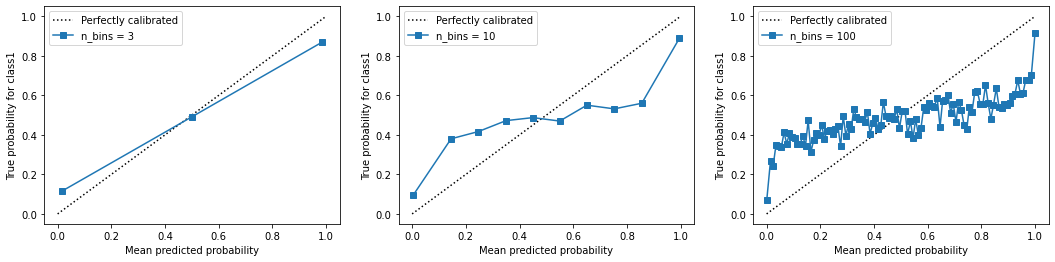

In [56]:
### different n_bins 
fig,axes = plt.subplots(1,3,figsize = (18,4)) 
for ind, i in enumerate([3,10,100]): 
    ax = axes[ind] 
    ax.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    trueproba, predproba = calibration_curve(Ytest,prob_pos,n_bins = i) 
    ax.plot(predproba,trueproba,'s-',label = 'n_bins = {}'.format(i))
    ax.set_ylabel('True probability for class1') 
    ax.set_xlabel('Mean predicted probability') 
    ax.set_ylim([-0.05,1.05]) 
    ax.legend() 
plt.show() 

In [57]:
# different models  
name = ['Gaussian Bayes','Logistics','SVC'] 
gnb = GaussianNB() 
logi = LR(C=1,
         solver = 'lbfgs', 
         max_iter = 3000, 
         multi_class= 'auto') 
svc = SVC(kernel = 'linear',gamma = 1) 



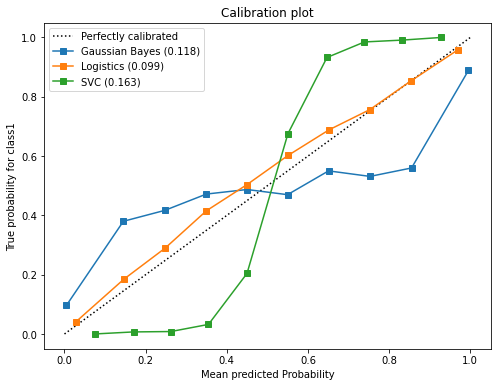

In [58]:
## 绘制多个模型的概率校准曲线 
fig,ax1 = plt.subplots(figsize = (8,6)) 
ax1.plot([0,1],[0,1],"k:", label="Perfectly calibrated") 
for clf,name_ in zip([gnb,logi,svc],name): 
    clf.fit(Xtrain,Ytrain) 
    y_pred = clf.predict(Xtest) 
    if hasattr(clf,'predict_proba'): 
        prob_pos = clf.predict_proba(Xtest)[:,1] 
    else: 
        prob_pos = clf.decision_function(Xtest) 
        prob_pos = (prob_pos - prob_pos.min())/(prob_pos.max() - prob_pos.min()) 
        
    clf_score = brier_score_loss(Ytest,prob_pos,pos_label = y.max()) 
    trueproba, predproba = calibration_curve(Ytest,prob_pos,n_bins = 10) 
    ax1.plot(predproba,trueproba,'s-',label="%s (%1.3f)" % (name_, clf_score)) 
ax1.set_ylabel('True probability for class1') 
ax1.set_xlabel('Mean predicted Probability') 
ax1.set_ylim([-0.05,1.05]) 
ax1.legend() 
ax1.set_title('Calibration plot') 
plt.show() 



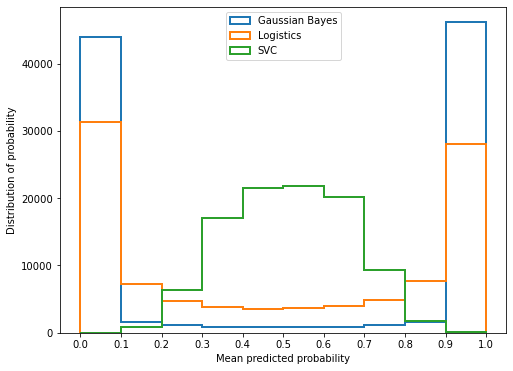

In [59]:
## 预测概率直方图 
fig,ax2 = plt.subplots(figsize = (8,6)) 
for clf,name_ in zip([gnb,logi,svc],name): 
    clf.fit(Xtrain,Ytrain) 
    y_pred = clf.predict(Xtest) 
    if hasattr(clf,"predict_proba"): 
        prob_pos = clf.predict_proba(Xtest)[:,1]
    else: 
        prob_pos = clf.decision_function(Xtest) 
        prob_pos = (prob_pos - prob_pos.min())/(prob_pos.max()-prob_pos.min()) 
    ax2.hist(prob_pos, bins = 10, label = name_, 
            histtype = "step", lw = 2) 
ax2.set_ylabel('Distribution of probability') 
ax2.set_xlabel('Mean predicted probability') 
ax2.set_xlim([-0.05,1.05]) 
ax2.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]) 
ax2.legend(loc = 9)
plt.show() 

In [60]:
## 校准可靠性曲线 
## calibrate reliability curve 
def plot_calib(models,name,Xtrain,Xtest,Ytrain,Ytest,n_bins=10):
    import matplotlib.pyplot as plt
    from sklearn.metrics import brier_score_loss
    from sklearn.calibration import calibration_curve 
    
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name_ in zip(models,name):
        clf.fit(Xtrain,Ytrain)
        y_pred = clf.predict(Xtest)
        #hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(Xtest)[:,1]
        else: # use decision function
            prob_pos = clf.decision_function(Xtest)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
#返回布里尔分数
        clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
        trueproba, predproba = calibration_curve(Ytest, prob_pos,n_bins=n_bins)
        ax1.plot(predproba, trueproba,"s-",label="%s (%1.3f)" % (name_, clf_score))
        ax2.hist(prob_pos, range=(0, 1), bins=n_bins, label=name_,histtype="step",lw=2)
    ax2.set_ylabel("Distribution of probability")
    ax2.set_xlabel("Mean predicted probability")
    ax2.set_xlim([-0.05, 1.05])
    ax2.legend(loc=9)
    ax2.set_title("Distribution of probablity")
    ax1.set_ylabel("True probability for class 1")
    ax1.set_xlabel("Mean predcited probability")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend()
    ax1.set_title('Calibration plots(reliability curve)')
    plt.show()

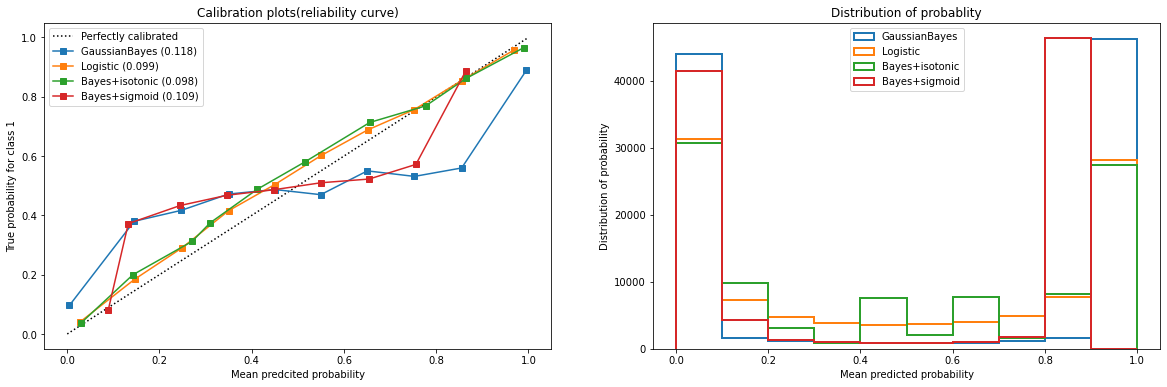

In [61]:
from sklearn.calibration import CalibratedClassifierCV
name = ["GaussianBayes","Logistic","Bayes+isotonic","Bayes+sigmoid"]
gnb = GaussianNB()
models = [gnb
,LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto")
#定义两种校准方式
,CalibratedClassifierCV(gnb, cv=2, method='isotonic')
,CalibratedClassifierCV(gnb, cv=2, method='sigmoid')]
plot_calib(models,name,Xtrain,Xtest,Ytrain,Ytest)


In [62]:
## 查看精确性变化 
gnb = GaussianNB().fit(Xtrain,Ytrain) 
gnb.score(Xtest,Ytest) 

0.8650606060606061

In [63]:
brier_score_loss(Ytest,gnb.predict_proba(Xtest)[:,1],pos_label = 1) 

0.11760826355000835

In [64]:
gnbisotonic = CalibratedClassifierCV(gnb,cv = 2,method = 'isotonic').fit(Xtrain,Ytrain) 
gnbisotonic.score(Xtest,Ytest) 

0.8626767676767677

In [65]:
brier_score_loss(Ytest,gnbisotonic.predict_proba(Xtest)[:,1],pos_label=1) 

0.09833190251353853

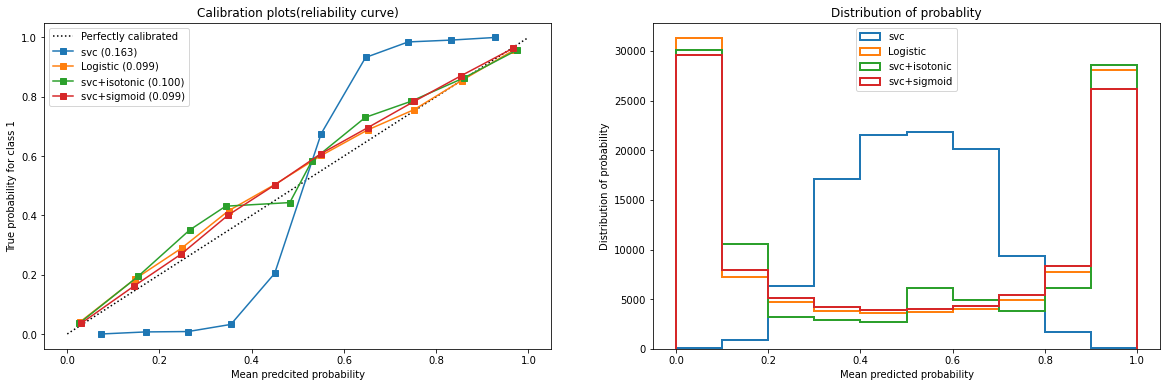

In [66]:
## calibrate svc 
name_svc = ['svc',"Logistic","svc+isotonic",'svc+sigmoid'] 
svc = SVC(kernel = 'linear',gamma = 1) 
model_svc= [svc,LR(C=1,solver = 'lbfgs',max_iter= 3000,multi_class= 'auto'),
           CalibratedClassifierCV(svc,cv = 2,method = 'isotonic'), 
           CalibratedClassifierCV(svc,cv = 2, method = 'sigmoid')] 
plot_calib(model_svc,name_svc,Xtrain,Xtest,Ytrain,Ytest) 

In [67]:
## Multinomial Naive Bayes 
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import brier_score_loss 

In [68]:
class_1 = 500
class_2 = 500 #两个类别分别设定500个样本
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [0.5, 0.5] #设定两个类别的方差
X, y = make_blobs(n_samples=[class_1, class_2],
centers=centers,
cluster_std=clusters_std,
random_state=0, shuffle=False)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)


In [69]:
np.unique(y) 

array([0, 1])

In [70]:
## 归一化 
mms = MinMaxScaler().fit(Xtrain) 
Xtrain_ = mms.transform(Xtrain) 
Xtest_ = mms.transform(Xtest) 

In [71]:
## 
mnb = MultinomialNB().fit(Xtrain_,Ytrain) 

In [72]:
mnb.class_log_prior_ 

array([-0.73993934, -0.648447  ])

In [73]:
(Ytrain ==1).sum()/Ytrain.shape[0] 

0.5228571428571429

In [74]:
## probability 
np.exp(mnb.class_log_prior_) 

array([0.47714286, 0.52285714])

In [75]:
## feature_log_prob 
mnb.feature_log_prob_

array([[-0.76129826, -0.62934581],
       [-0.72443164, -0.66281182]])

In [76]:
## class_count 
mnb.class_count_ 

array([334., 366.])

In [77]:
## predict, predict_proba 
mnb.predict(Xtest_) 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [78]:
mnb.predict_proba(Xtest_) 

array([[0.47580657, 0.52419343],
       [0.47574974, 0.52425026],
       [0.47845615, 0.52154385],
       [0.47718478, 0.52281522],
       [0.47799402, 0.52200598],
       [0.4755782 , 0.5244218 ],
       [0.47712038, 0.52287962],
       [0.47674115, 0.52325885],
       [0.47914439, 0.52085561],
       [0.47698334, 0.52301666],
       [0.47543795, 0.52456205],
       [0.4790983 , 0.5209017 ],
       [0.4765261 , 0.5234739 ],
       [0.4771908 , 0.5228092 ],
       [0.4802018 , 0.5197982 ],
       [0.47694425, 0.52305575],
       [0.47924506, 0.52075494],
       [0.47566237, 0.52433763],
       [0.47838809, 0.52161191],
       [0.47725792, 0.52274208],
       [0.47603583, 0.52396417],
       [0.47489976, 0.52510024],
       [0.47536738, 0.52463262],
       [0.47882872, 0.52117128],
       [0.47652241, 0.52347759],
       [0.47877871, 0.52122129],
       [0.47743421, 0.52256579],
       [0.47635266, 0.52364734],
       [0.4773943 , 0.5226057 ],
       [0.47895701, 0.52104299],
       [0.

In [79]:
mnb.score(Xtest_,Ytest) 

0.44666666666666666

In [80]:
brier_score_loss(Ytest,mnb.predict_proba(Xtest_)[:,1],pos_label=1) 

0.2529379788163027

In [81]:
#分箱 
#Xtrain 转化为分类型数据 
from sklearn.preprocessing import KBinsDiscretizer
kbs = KBinsDiscretizer(n_bins = 10,encode = 'onehot').fit(Xtrain) 

In [82]:
Xtrain_ = kbs.transform(Xtrain) 
Xtest_ = kbs.transform(Xtest) 


In [83]:
mnb = MultinomialNB().fit(Xtrain_,Ytrain) 
mnb.score(Xtest_,Ytest) 

0.9966666666666667

In [84]:
brier_score_loss(Ytest,mnb.predict_proba(Xtest_)[:,1],pos_label=1) 

0.005418560204369728

In [85]:
# Bernuoli Bayes 
from sklearn.naive_bayes import BernoulliNB 


In [86]:
# 归一化 
mms = MinMaxScaler().fit(Xtrain) 
Xtrain_ = mms.transform(Xtrain) 
Xtest_ = mms.transform(Xtest) 


In [87]:
# 不设置二值化
bn1 = BernoulliNB().fit(Xtrain_,Ytrain) 
bn1.score(Xtest_,Ytest) 

0.45666666666666667

In [88]:
brier_score_loss(Ytest,bn1.predict_proba(Xtest_)[:,1],pos_label=1) 

0.2515760995065559

In [89]:
## 设置二值化 
bn2 = BernoulliNB(binarize=0.5).fit(Xtrain_,Ytrain) 
bn2.score(Xtest,Ytest)  

0.9333333333333333

In [90]:
brier_score_loss(Ytest,bn2.predict_proba(Xtest_)[:,1],pos_label=1) 

0.012047717940996546

In [91]:
###探索数据样本不平衡

from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import brier_score_loss as BS,recall_score,roc_auc_score as AUC
class_1 = 50000 #多数类为50000个样本
class_2 = 500 #少数类为500个样本
centers = [[0.0, 0.0], [5.0, 5.0]] #设定两个类别的中心
clusters_std = [3, 1] #设定两个类别的方差
X, y = make_blobs(n_samples=[class_1, class_2],
centers=centers,
cluster_std=clusters_std,
random_state=0, shuffle=False)

In [92]:
X.shape

(50500, 2)

In [93]:
np.unique(y) 

array([0, 1])

In [94]:
name = ['Multinomial','Gaussian','Bernuoli'] 
models = [MultinomialNB(),GaussianNB(),BernoulliNB()] 

for name, clf in zip(name,models): 
    Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state= 420) 
    
    if name!= 'Gaussian': 
        kbs = KBinsDiscretizer(n_bins = 10, encode = 'onehot').fit(Xtrain) 
        Xtrain = kbs.transform(Xtrain) 
        Xtest = kbs.transform(Xtest)  
        
    clf.fit(Xtrain,Ytrain) 
    y_pred = clf.predict(Xtest) 
    proba = clf.predict_proba(Xtest)[:,1] 
    score = clf.score(Xtest,Ytest) 
    print(name) 
    print("\tBrier:{:.3f}".format(BS(Ytest,proba,pos_label=1)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\tRecall:{:.3f}".format(recall_score(Ytest,y_pred)))
    print("\tAUC:{:.3f}".format(AUC(Ytest,proba)))

        

Multinomial
	Brier:0.007
	Accuracy:0.990
	Recall:0.000
	AUC:0.991
Gaussian
	Brier:0.006
	Accuracy:0.990
	Recall:0.438
	AUC:0.993
Bernuoli
	Brier:0.009
	Accuracy:0.987
	Recall:0.771
	AUC:0.987


In [99]:
from sklearn.naive_bayes import ComplementNB 
from time import time 
import datetime 

name = ['Multinomial','Gaussian','Bernoulli','Complement'] 
models = [MultinomialNB(),GaussianNB(),BernoulliNB(),ComplementNB()] 

for name,clf in zip(name,models): 
    times = time() 
    Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size= 0.3, random_state= 420) 
    
    if name != 'Gaussian': 
        kbs = KBinsDiscretizer(n_bins = 10, encode= 'onehot').fit(Xtrain) 
        Xtrain = kbs.transform(Xtrain) 
        Xtest = kbs.transform(Xtest) 
        
    clf.fit(Xtrain,Ytrain) 
    y_pred = clf.predict(Xtest) 
    proba = clf.predict_proba(Xtest)[:,1] 
    score = clf.score(Xtest,Ytest) 
    
    print(name) 
    print("\tBrier:{:.3f}".format(BS(Ytest,proba,pos_label=1)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\tRecall:{:.3f}".format(recall_score(Ytest,y_pred)))
    print("\tAUC:{:.3f}".format(AUC(Ytest,proba)))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")) 

Multinomial
	Brier:0.007
	Accuracy:0.990
	Recall:0.000
	AUC:0.991
00:00:055335
Gaussian
	Brier:0.006
	Accuracy:0.990
	Recall:0.438
	AUC:0.993
00:00:029797
Bernoulli
	Brier:0.009
	Accuracy:0.987
	Recall:0.771
	AUC:0.987
00:00:055982
Complement
	Brier:0.038
	Accuracy:0.953
	Recall:0.987
	AUC:0.991
00:00:047299


In [102]:
##Naive Bayes 文本分类 
sample = ['Machine learning is fascinating, it is wonderful', 
         'Machine learning is a sensational technology', 
         'Elsa is a popular character'] 
from sklearn.feature_extraction.text import CountVectorizer 
vec = CountVectorizer() 
x = vec.fit_transform(sample) 
x 

<3x11 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [104]:
## 调用每个列的名称 
import pandas as pd 
cvresult = pd.DataFrame(x.toarray(),columns = vec.get_feature_names()) 
cvresult 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,character,elsa,fascinating,is,it,learning,machine,popular,sensational,technology,wonderful
0,0,0,1,2,1,1,1,0,0,0,1
1,0,0,0,1,0,1,1,0,1,1,0
2,1,1,0,1,0,0,0,1,0,0,0


In [105]:
## TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF 
vec = TFIDF() 

x =  vec.fit_transform(sample) 

In [107]:
TFIDFresult = pd.DataFrame(x.toarray(),columns = vec.get_feature_names()) 
TFIDFresult 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,character,elsa,fascinating,is,it,learning,machine,popular,sensational,technology,wonderful
0,0.000000,0.000000,0.424396,0.501310,0.424396,0.322764,0.322764,0.000000,0.000000,0.000000,0.424396
1,0.000000,0.000000,0.000000,0.315444,0.000000,0.406192,0.406192,0.000000,0.534093,0.534093,0.000000
2,0.546454,0.546454,0.000000,0.322745,0.000000,0.000000,0.000000,0.546454,0.000000,0.000000,0.000000


In [109]:
cvresult.sum(axis = 0)/cvresult.sum(axis = 0).sum()  

character      0.0625
elsa           0.0625
fascinating    0.0625
is             0.2500
it             0.0625
learning       0.1250
machine        0.1250
popular        0.0625
sensational    0.0625
technology     0.0625
wonderful      0.0625
dtype: float64

In [111]:
TFIDFresult.sum(axis = 0) / TFIDFresult.sum(axis = 0).sum() 

character      0.083071
elsa           0.083071
fascinating    0.064516
is             0.173225
it             0.064516
learning       0.110815
machine        0.110815
popular        0.083071
sensational    0.081192
technology     0.081192
wonderful      0.064516
dtype: float64

In [112]:
from sklearn.datasets import fetch_20newsgroups 

In [113]:
data = fetch_20newsgroups() 

In [114]:
data.target_names 

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [116]:
import numpy as np 
import pandas as pd 

categories = ['sci.space', 
             'rec.sport.hockey',
             'talk.politics.guns', 
             'talk.politics.mideast'] 
 
train = fetch_20newsgroups(subset = 'train',categories = categories) 
test = fetch_20newsgroups(subset  = 'test', categories=  categories) 


In [119]:
train.target_names 

['rec.sport.hockey',
 'sci.space',
 'talk.politics.guns',
 'talk.politics.mideast']

In [120]:
len(train.data) 

2303

In [122]:
print(train.data[0] ) 

From: tvartiai@vipunen.hut.fi (Tommi Vartiainen)
Subject: Re: Finland/Sweden vs.NHL teams (WAS:Helsinki/Stockholm & NHL expansion)
Nntp-Posting-Host: vipunen.hut.fi
Organization: Helsinki University of Technology, Finland
Lines: 51

In <1993Apr16.195754.5476@ousrvr.oulu.fi> mep@phoenix.oulu.fi (Marko Poutiainen) writes:

>: FINLAND:  
>: 
>: D-Jyrki Lumme.......20
>: D-Teppo Numminen....20
>: D-Peter Ahola.......13
>: 
>Well well, they don't like our defenders (mainly Lumme and Numminen)...

About 25 is correct for Numminen and Lumme.


>: R-Teemu Selanne.....27
>: 
>Compared to Kurri, Selanne's points are too high, lets make it 25 or 26.

No, Kurri's points are too low. 27 for Kurri and 28 for Sel{nne.

>: well in the Canada Cup and World Championships largely due to the efforts of
>: Markus Ketterer (the goalie), 3-4 or the players listed above and luck. There's
>: presumably a lot of decent players in Finland that wouldn't be superstars at
>: the highest level but still valuable rol

In [124]:
 np.unique(train.target)  

array([0, 1, 2, 3])

In [127]:
for i in [0,1,2,3]: 
    print(i,(train.target ==i).sum()/len(train.target))

0 0.26052974381241856
1 0.25749023013460703
2 0.23708206686930092
3 0.24489795918367346


In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF 

In [130]:
Xtrain = train.data 
Xtest = test.data 
Ytrain = train.target 
Ytest = test.target 


In [132]:
tfidf = TFIDF().fit(Xtrain) 
Xtrain_ = tfidf.transform(Xtrain) 
Xtest_ = tfidf.transform(Xtest ) 


In [133]:
Xtrain_ 

<2303x40725 sparse matrix of type '<class 'numpy.float64'>'
	with 430306 stored elements in Compressed Sparse Row format>

In [134]:
tosee = pd.DataFrame(Xtrain_.toarray(), columns = tfidf.get_feature_names()) 
tosee.head() 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,0000,00000,000000,000021,000062david42,000152,000246,000256,...,zwrm,zx,zx6wre,zxp,zxqi,zy,zyg,zz,zz_g9q3,zzzzzz
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.058046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
 tosee.shape 

(2303, 40725)

In [136]:
## Bayes Model on Data 

In [151]:
# dummy variable of y 
Ytest_ = Ytest.copy() 
Ytest_ = pd.get_dummies(Ytest_) 

In [157]:
from sklearn.naive_bayes import MultinomialNB,ComplementNB, BernoulliNB 
from sklearn.metrics import brier_score_loss as BS 

name = ['Multinomial','Complement','Bernoulli'] 
models = [MultinomialNB(),ComplementNB(),BernoulliNB()] 

for name, clf in zip(name,models): 
    clf.fit(Xtrain_,Ytrain) 
    y_pred = clf.predict(Xtest_) 
    proba = clf.predict_proba(Xtest_) 
    score = clf.score(Xtest_,Ytest) 
    print(name) 
    
    Bscore = [] 
    for i in range(len(np.unique(Ytrain))): 
        bs = BS(Ytest_[i],proba[:,i],pos_label = i) 
        Bscore.append(bs) 
        
        print('\tBrier under {}:{:.3f}'.format(train.target_names[i],bs)) 
        
    print('\tAverage Brier:{:.3f}'.format(np.mean(Bscore))) 
    print('\tAccuracy:{:.3f}'.format(score)) 
    print('\n')  

Multinomial
	Brier under rec.sport.hockey:0.857
	Brier under sci.space:0.033
	Brier under talk.politics.guns:0.169
	Brier under talk.politics.mideast:0.178
	Average Brier:0.309
	Accuracy:0.975


Complement
	Brier under rec.sport.hockey:0.804
	Brier under sci.space:0.039
	Brier under talk.politics.guns:0.137
	Brier under talk.politics.mideast:0.160
	Average Brier:0.285
	Accuracy:0.986


Bernoulli
	Brier under rec.sport.hockey:0.925
	Brier under sci.space:0.025
	Brier under talk.politics.guns:0.205
	Brier under talk.politics.mideast:0.193
	Average Brier:0.337
	Accuracy:0.902




In [165]:
## calibration cv 
from sklearn.calibration import CalibratedClassifierCV 

In [166]:
name = ["Multinomial"
,"Multinomial + Isotonic"
,"Multinomial + Sigmoid"
,"Complement"
,"Complement + Isotonic"
,"Complement + Sigmoid"
,"Bernoulli"
,"Bernoulli + Isotonic"
,"Bernoulli + Sigmoid"]
models = [MultinomialNB()
,CalibratedClassifierCV(MultinomialNB(), cv=2, method='isotonic')
,CalibratedClassifierCV(MultinomialNB(), cv=2, method='sigmoid')
,ComplementNB()
,CalibratedClassifierCV(ComplementNB(), cv=2, method='isotonic')
,CalibratedClassifierCV(ComplementNB(), cv=2, method='sigmoid')
,BernoulliNB()
,CalibratedClassifierCV(BernoulliNB(), cv=2, method='isotonic')
,CalibratedClassifierCV(BernoulliNB(), cv=2, method='sigmoid')
]

In [167]:
for name,clf in zip(name,models):
    clf.fit(Xtrain_,Ytrain)
    y_pred = clf.predict(Xtest_)
    proba = clf.predict_proba(Xtest_)
    score = clf.score(Xtest_,Ytest)
    print(name)
    Bscore = []
    for i in range(len(np.unique(Ytrain))):
        bs = BS(Ytest_[i],proba[:,i],pos_label=i)
        Bscore.append(bs)
        print("\tBrier under {}:{:.3f}".format(train.target_names[i],bs))
    print("\tAverage Brier:{:.3f}".format(np.mean(Bscore)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\n")

Multinomial
	Brier under rec.sport.hockey:0.857
	Brier under sci.space:0.033
	Brier under talk.politics.guns:0.169
	Brier under talk.politics.mideast:0.178
	Average Brier:0.309
	Accuracy:0.975


Multinomial + Isotonic
	Brier under rec.sport.hockey:0.980
	Brier under sci.space:0.012
	Brier under talk.politics.guns:0.226
	Brier under talk.politics.mideast:0.228
	Average Brier:0.362
	Accuracy:0.973


Multinomial + Sigmoid
	Brier under rec.sport.hockey:0.968
	Brier under sci.space:0.012
	Brier under talk.politics.guns:0.219
	Brier under talk.politics.mideast:0.222
	Average Brier:0.355
	Accuracy:0.973


Complement
	Brier under rec.sport.hockey:0.804
	Brier under sci.space:0.039
	Brier under talk.politics.guns:0.137
	Brier under talk.politics.mideast:0.160
	Average Brier:0.285
	Accuracy:0.986


Complement + Isotonic
	Brier under rec.sport.hockey:0.984
	Brier under sci.space:0.007
	Brier under talk.politics.guns:0.227
	Brier under talk.politics.mideast:0.230
	Average Brier:0.362
	Accuracy:0.9